# Actividad 4 - Predicción de la gravedad de accidentes
---
Adrian Diaz Manzanares - 22016494

Juan Carlos Jimenez Flores - 22059255

Rodrigo Muñoz Pedraza - 22062417 

Leonardo Cerón Carrasco - 22272038

---

![trafico](https://e00-elmundo.uecdn.es/assets/multimedia/imagenes/2018/08/06/15335560010020.jpg)

El objetivo de la Actividad es seleccionar un modelo de negocio y conjunto de datos al que vamos a aplicar el procedimiento de trabajo que hemos seguido en clase, para ello sucesivamente iremos tratando los datos con los algoritmos de ML (regresión lineal, logística, árboles, bayesiana, random forest, SVM, K-nearest, K-fold, leave-one-out, redes neuronales).

Nuestro proyecto se basa en la <b>predicción de la gravedad de los accidentes en las carreteras</b>. En un principio quisimos realizar la predicción sobre las carreteras de España creando un dataset con los tweets de la cuenta oficial de la DGT pero no logramos una buena precisión, por lo que finalmente utilizamos el dataset [US Accidents](https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents), extraído de Kaggle. Este contiene un conjunto de accidentes automovilísticos de todo el país, que cubre 49 estados de los EE. UU. Los datos de accidentes se recopilan desde febrero de 2016 hasta diciembre de 2021, utilizando múltiples API que proporcionan transmisión de datos de incidentes (o eventos) de tráfico.

Los accidentes se clasifican por <b>4 niveles de gravedad</b> donde 1 indica poco impacto en el tráfico y 4 un gran impacto.

Seguimos los siguientes pasos:
1. Importación y preparación de los datos
2. Análisis exploratorio de datos (EDA)
3. Construcción y evaluación de modelos
4. Conclusiones

# 1. Importación y preparación de los datos

Detalles sobre las características en el conjunto de datos:

<b>Atributos de tráfico (12):</b>

- ID: Este es un identificador único del registro de accidentes.

- TMC: un accidente de tráfico puede tener un código de canal de mensajes de tráfico (TMC) que proporciona una descripción más detallada del evento.

- Severity: muestra la gravedad del accidente, un número entre 1 y 4, donde 1 indica el menor impacto en el tráfico (es decir, un retraso breve como resultado del accidente) y 4 indica un impacto significativo en el tráfico (es decir, un retraso prolongado). .

- Start_Time: muestra la hora de inicio del accidente en la zona horaria local.

- End_Time: muestra la hora de finalización del accidente en la zona horaria local.

- Start_Lat: muestra la latitud en coordenadas GPS del punto de inicio.

- Start_Lng: muestra la longitud en coordenadas GPS del punto de inicio.

- End_Lat: muestra la latitud en coordenadas GPS del punto final.

- End_Lng: muestra la longitud en coordenadas GPS del punto final.

- Distance (mi): La longitud de la extensión de la carretera afectada por el accidente.

- Description: Muestra la descripción del accidente en lenguaje natural.

<b>Atributos de dirección (9):</b>

- Number: Muestra el número de la calle en el campo de dirección.

- Street: Muestra el nombre de la calle en el campo de dirección.

- Side: Muestra el lado relativo de la calle (Derecha/Izquierda) en el campo de dirección.

- City: Muestra la ciudad en el campo de dirección.

- County: Muestra el condado en el campo de dirección.

- State: Muestra el estado en el campo de dirección.

- Zipcode: muestra el código postal en el campo de dirección.

- Country: Muestra el país en el campo de dirección.

- Timezone: muestra la zona horaria según la ubicación del accidente (este, centro, etc.).

<b>Atributos del tiempo (11):</b>

- Airport_Code: indica una estación meteorológica basada en el aeropuerto que es la más cercana al lugar del accidente.

- Weather_Timestamp: muestra la marca de tiempo del registro de observación meteorológica (en hora local).

- Temperature (F): Muestra la temperatura (en Fahrenheit).

- Wind_Chill(F): muestra la sensación térmica (en Fahrenheit).

- Humidity (%): Muestra la humedad (en porcentaje).

- Pressure (en): muestra la presión del aire (en pulgadas).

- Visibility (mi): muestra la visibilidad (en millas).

- Wind_Direction: muestra la dirección del viento.

- Wind_Speed(mph): Muestra la velocidad del viento (en millas por hora).

- Precipitation (en): Muestra la cantidad de precipitación en pulgadas, si hay alguna.

- Weather_Condition: muestra las condiciones meteorológicas (lluvia, nieve, tormenta eléctrica, niebla, etc.).

<b>Atributos de puntos de interés (13):</b>

- Service: una anotación de punto de interés (POI) que indica la presencia de un servicio en una ubicación cercana.

- Bump: una anotación de PDI que indica la presencia de badenes o jorobas en un lugar cercano.

- Crossing: una anotación de PDI que indica la presencia de un cruce en un lugar cercano.

- Give_Way: una anotación de punto de interés que indica la presencia de una señal de give_way en una ubicación cercana.

- Junction: una anotación de PDI que indica la presencia de un cruce en una ubicación cercana.

- No_Exit: una anotación de PDI que indica la presencia de una señal de no_exit en una ubicación cercana.

- Railway: una anotación de PDI que indica la presencia de ferrocarril en un lugar cercano.

- Roundabout: una anotación de PDI que indica la presencia de una rotonda en una ubicación cercana.

- Station: una anotación de PDI que indica la presencia de una estación (autobús, tren, etc.) en una ubicación cercana.

- Stop: una anotación de PDI que indica la presencia de una señal de alto en un lugar cercano.

- Traffic_Calming: una anotación de PDI que indica la presencia de medios de Traffic_Calming en una ubicación cercana.

- Traffic_Signal: una anotación de PDI que indica la presencia de traffic_signal en una ubicación cercana.

- Turning_Loop: una anotación de PDI que indica la presencia de turning_loop en una ubicación cercana.

<b>Período de día (4):</b>

- Sunrise_Sunset: muestra el período del día (es decir, día o noche) en función del amanecer/atardecer.

- Civil_Twilight: Muestra el período del día (es decir, día o noche) basado en el crepúsculo civil.

- Nautical_Twilight: Muestra el período del día (es decir, día o noche) basado en el crepúsculo náutico.

- Astronomical_Twilight: Muestra el período del día (es decir, día o noche) basado en el crepúsculo astronómico.

Importamos los datos utilizando pandas y obtenemos 10000 filas de cada nivel de gravedad que nuestro conjunto de datos sea uniforme.

In [1]:
import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings('ignore')

df_all = pd.read_csv("./data/US_Accidents_Dec21_updated.csv", sep=",")

In [2]:
df1 = df_all[df_all["Severity"] == 1]
df1 = df1.iloc[:10000]
df2 = df_all[df_all["Severity"] == 2]
df2 = df2.iloc[:10000]
df3 = df_all[df_all["Severity"] == 3]
df3 = df3.iloc[:10000]
df4 = df_all[df_all["Severity"] == 4]
df4 = df4.iloc[:10000]

In [3]:
df = pd.concat([df1,df2,df3,df4])
df

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
1735388,A-1735389,1,2020-08-03 14:35:16,2020-08-03 15:20:16,32.20676,-110.98050,32.20676,-110.98050,0.000,At I-10/Freeway - Accident.,...,False,False,True,False,True,False,Day,Day,Day,Day
1736991,A-1736992,1,2020-09-22 16:44:38,2020-09-22 17:29:38,32.38084,-110.96392,32.38084,-110.96392,0.000,At N 1st Ave - Accident.,...,False,False,False,False,True,False,Day,Day,Day,Day
1749719,A-1749720,1,2020-08-03 15:42:10,2020-08-03 15:57:10,41.37978,-81.99410,41.37978,-81.99410,0.000,At I-80 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
1751859,A-1751860,1,2020-09-22 16:29:33,2020-09-22 17:14:33,33.63950,-112.13436,33.63950,-112.13436,0.000,At N 35th Ave - Accident.,...,False,False,False,False,True,False,Day,Day,Day,Day
1753408,A-1753409,1,2020-08-03 13:41:01,2020-08-03 13:56:01,38.08320,-122.11450,38.08320,-122.11450,0.000,At Lake Herman Rd - Accident. Hard shoulder bl...,...,False,False,False,False,False,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80334,A-80335,4,2016-06-22 15:24:08,2016-06-22 21:24:08,40.42586,-79.67489,40.42244,-79.66165,0.735,Closed at Old William Penn Hwy - Road closed d...,...,False,False,True,False,False,False,Day,Day,Day,Day
80347,A-80348,4,2016-06-22 15:40:54,2016-06-22 21:40:54,41.52357,-81.26492,41.52735,-81.25632,0.516,Closed at Fowlers Mill Rd - Road closed due to...,...,False,False,False,False,False,False,Day,Day,Day,Day
80349,A-80350,4,2016-06-22 15:40:54,2016-06-22 21:40:54,41.52735,-81.25632,41.52357,-81.26492,0.516,Closed at Butternut Rd - Road closed due to ac...,...,False,False,False,False,False,False,Day,Day,Day,Day
80356,A-80357,4,2016-06-22 15:57:36,2016-06-22 21:57:36,29.15246,-81.07381,29.22635,-81.10525,5.446,Closed between I-4/SR-400/Exit 260 and CR-4019...,...,False,False,False,False,False,False,Day,Day,Day,Day


Eliminamos las columnas repetidas y las que tienen datos nulos en su mayoría.

In [4]:
df = df.drop(['End_Lat', 'End_Lng', 'Number', 'Wind_Chill(F)', 'Precipitation(in)'], axis=1)

In [5]:
df = df.dropna(axis=0).reset_index(drop=True)

Eliminamos las columnas que no tienen datos relevantes a la hora de predecir la gravedad del accidente como la calle, ciudad, código postal y país debido a que con la latitud y longitud es suficiente información para saber la localización del accidente.

In [6]:
df = df.drop(['ID', 'Description', 'Street', 'City', 'Zipcode', 'Country', 'County', "Airport_Code"], axis=1)

Dividimos las fechas de cada columna por mes y año para mejorar la precisión del modelo

In [7]:
def get_years(df, column):
    return df[column].apply(lambda date: date[0:4])

def get_months(df, column):
    return df[column].apply(lambda date: date[5:7])

In [8]:
df['Start_Time_Month'] = get_months(df, 'Start_Time')
df['Start_Time_Year'] = get_years(df, 'Start_Time')
df['End_Time_Month'] = get_months(df, 'End_Time')
df['End_Time_Year'] = get_years(df, 'End_Time')
df['Weather_Timestamp_Month'] = get_months(df, 'Weather_Timestamp')
df['Weather_Timestamp_Year'] = get_years(df, 'Weather_Timestamp')

df = df.drop(['Start_Time', 'End_Time', 'Weather_Timestamp'], axis=1)

Para poder utilizar variables categóricas en nuestro modelos, es necesario aplicar una codificación One-Hot para crear una columna por cada valor distinto que exista, marcando con un 1 la columna a la que pertenezca dicho registro y dejando las demás con un 0

In [9]:
def onehot_encode(df, columns, prefixes):
    df = df.copy()
    for column, prefix in zip(columns, prefixes):
        dummies = pd.get_dummies(df[column], prefix=prefix)
        df = pd.concat([df, dummies], axis=1)
        df = df.drop(column, axis=1)
    return df

Aplicamos la codificación a todas las variables categóricas

In [10]:
df = onehot_encode(df, columns=['Side', 'State', 'Timezone', 'Wind_Direction', 'Weather_Condition'], prefixes=['SI', 'ST', 'TZ', 'WD', 'WC'])

Las columnas restantes también son categóricas, pero únicamente disponen de dos categorías (noche y día), por lo que reemplazamos el día por un 1 y la noche por un 0

In [11]:
def get_binary_column(df, column):
    return df[column].apply(lambda x: 1 if x == 'Day' else 0)

In [12]:
df['Sunrise_Sunset'] = get_binary_column(df, 'Sunrise_Sunset')
df['Civil_Twilight'] = get_binary_column(df, 'Civil_Twilight')
df['Nautical_Twilight'] = get_binary_column(df, 'Nautical_Twilight')
df['Astronomical_Twilight'] = get_binary_column(df, 'Astronomical_Twilight')

Asignamos la "<b>X</b>" (todas las columnas menos las gravedad) y la "<b>y</b>" (gravedad del accidente)

In [13]:
y = df['Severity'].copy()
X = df.drop('Severity', axis=1).copy()

In [14]:
y.unique()

array([1, 2, 3, 4], dtype=int64)

# 2. Análisis exploratorio de datos (EDA)

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm

Cargamos todos los datos para el análisis

In [16]:
eda_df = pd.read_csv("./data/US_Accidents_Dec21_updated.csv", sep=",")

In [17]:
def random_colors(n):
    colors = []
    for i in range(n):
        colors.append((np.random.random(), np.random.random(), np.random.random()))
    return colors

<b>Número de accidentes por estados</b><br>
La mayoría de accidentes se producen en el estado de California

<AxesSubplot:>

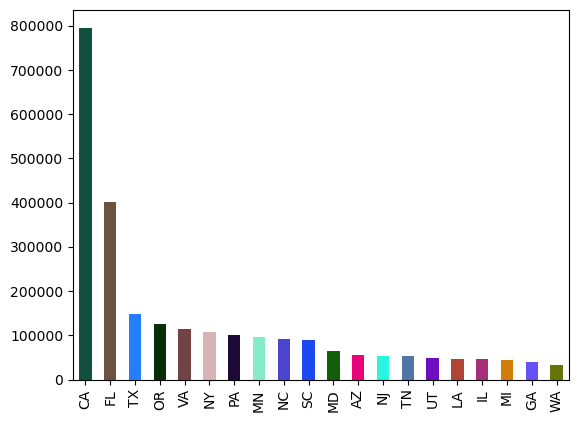

In [18]:
state_accidents = eda_df["State"].value_counts()
colors = random_colors(20)
state_accidents[:20].plot(kind = 'bar', color = colors)

<b>Figura 1.</b> Gráfica de barras de la cantidad de accidentes por estado en Estados Unidos

<b>Número de accidentes por ciudades ciudades</b><br>
La mayoría de accidentes se producen en Miami

<AxesSubplot:>

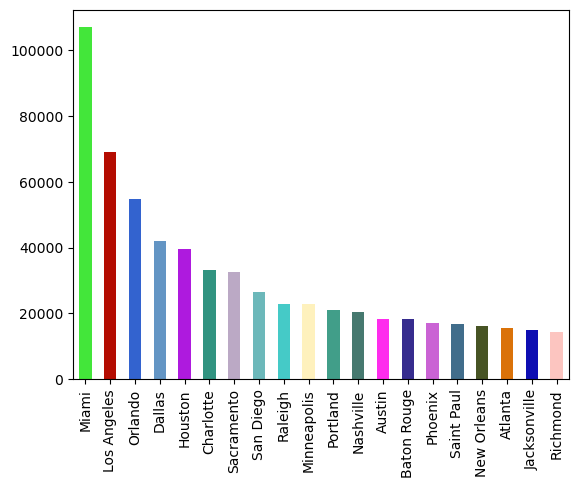

In [19]:
cities_accidents = eda_df["City"].value_counts()
colors = random_colors(20)
cities_accidents[:20].plot(kind = 'bar',color=colors)

<b>Figura 2.</b> Gráfica de barras de la cantidad de accidentes por ciudad en Estados Unidos

<b>Cantidad de accidentes según la gravedad</b><br>
La mayoría de accidentes son de nivel de gravedad 2

<AxesSubplot:ylabel='Severity'>

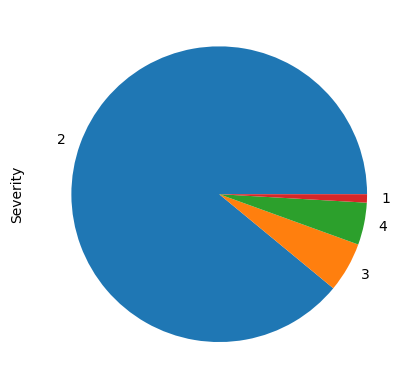

In [20]:
severities_accidents = eda_df["Severity"].value_counts()
colors = random_colors(20)
severities_accidents.plot(kind = 'pie')

<b>Figura 3.</b> Gráfica de barras de la gravedad de los accidentes en Estados Unidos

<b>Accidentes por hora</b><br>
La mayoría de accidentes se producen a las 17 horas

<AxesSubplot:>

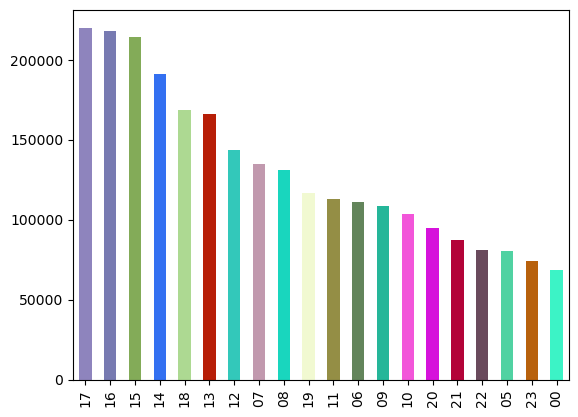

In [21]:
def get_hours(df, column):
    return df[column].apply(lambda date: date[11:13])

hour_accidents = get_hours(eda_df, "Start_Time")
hour_accidents = hour_accidents.value_counts()
colors = random_colors(20)
hour_accidents[:20].plot(kind = 'bar', color = colors)

<b>Figura 4.</b> Gráfica de barras de la cantidad de accidentes por hora en Estados Unidos

<b>Accidentes por condición meteorológica</b><br>
Los accidentes no son más frecuentes en condiciones meteorológicas adversas

<AxesSubplot:>

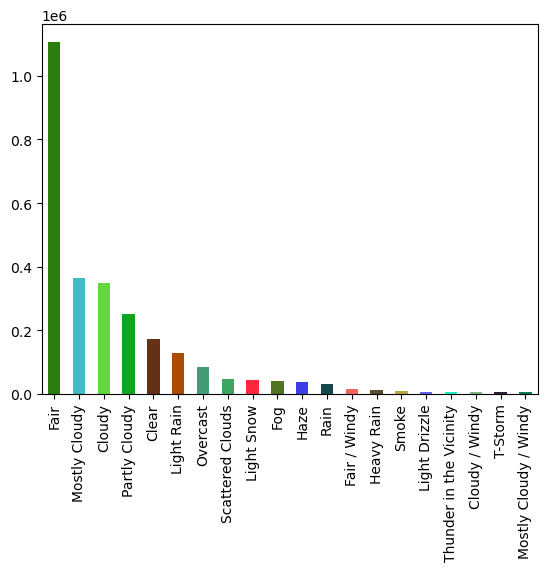

In [22]:
weather_accidents = eda_df["Weather_Condition"].value_counts()
colors = random_colors(20)
weather_accidents[:20].plot(kind = 'bar', color = colors)

<b>Figura 5.</b> Gráfica de barras de la cantidad de accidentes por condición meteorológica en Estados Unidos

<b>Accidentes de gravedad 4 por condición meteorológica</b><br>
Los accidentes más graves se producen en condiciones meteorológicas normales

<AxesSubplot:>

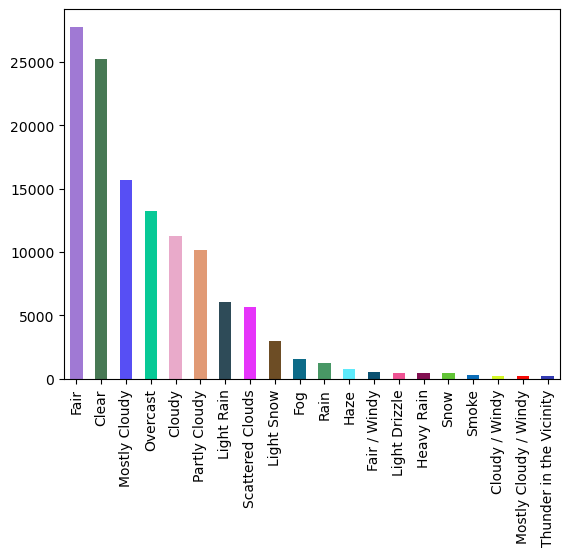

In [23]:
sev4 = eda_df[eda_df["Severity"] == 4]
sev4 = sev4["Weather_Condition"].value_counts()
colors = random_colors(20)
sev4[:20].plot(kind = 'bar', color = colors)

<b>Figura 6.</b> Gráfica de barras de la cantidad de accidentes de gravedad 4 por condición meteorológica en Estados Unidos

# 3. Construcción y evaluación de modelos

![explicabilidad y rendimiento](https://www.mathworks.com/discovery/interpretability/_jcr_content/mainParsys/image.adapt.full.medium.svg/1670433657216.svg)

<b>Figura 7.</b> Explicabilidad del modelo frente al rendimiento de este para los diferentes algoritmos de machine learning

La solución ideal debe tener tanto una alta explicabilidad como un alto rendimiento. Sin embargo, los modelos lineales existentes, los modelos basados en reglas y los árboles de decisión son más transparentes, pero con un rendimiento más bajo en general. Por el contrario, los modelos complejos, por ejemplo, el aprendizaje profundo y los conjuntos, manifiestan un mayor rendimiento mientras que se puede obtener una menor explicabilidad.

Dividimos el dataset para entrenar y probar el modelo con datos diferentes

In [24]:
from xgboost import XGBClassifier, plot_importance
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [25]:
dfa = eda_df[['Severity','Start_Lat','Start_Lng','Distance(mi)','Temperature(F)','Humidity(%)','Pressure(in)','Visibility(mi)']]
dfa

,Severity,Start_Lat,Start_Lng,Distance(mi),Temperature(F),Humidity(%),Pressure(in),Visibility(mi)
0,3,40.108910,-83.092860,3.230,42.1,58.0,29.76,10.0
1,2,39.865420,-84.062800,0.747,36.9,91.0,29.68,10.0
2,2,39.102660,-84.524680,0.055,36.0,97.0,29.70,10.0
3,2,41.062130,-81.537840,0.123,39.0,55.0,29.65,10.0
4,3,39.172393,-84.492792,0.500,37.0,93.0,29.69,10.0
...,...,...,...,...,...,...,...,...
2845337,2,34.002480,-117.379360,0.543,86.0,40.0,28.92,10.0
2845338,2,32.766960,-117.148060,0.338,70.0,73.0,29.39,10.0
2845339,2,33.775450,-117.847790,0.561,73.0,64.0,29.74,10.0
2845340,2,33.992460,-118.403020,0.772,71.0,81.0,29.62,10.0


In [26]:
target = 'Severity'
features_list = list(dfa.columns)
features_list.remove(target)

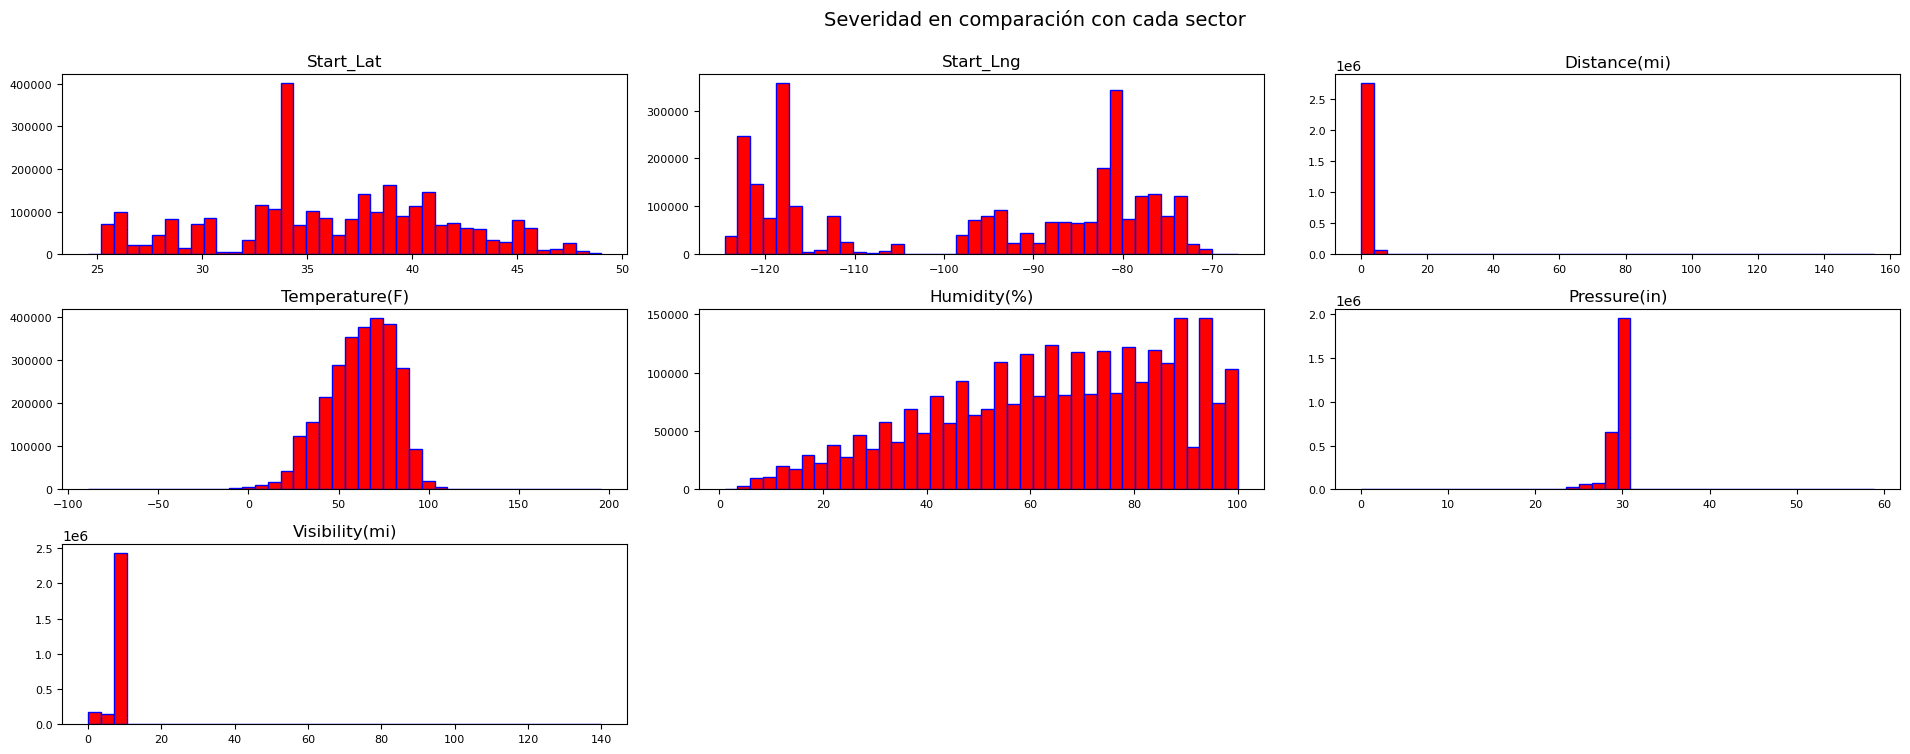

In [27]:
dfa[features_list].hist(bins=40, edgecolor='b', linewidth=1.0,
                          xlabelsize=8, ylabelsize=8, grid=False, 
                          figsize=(16,6), color='red')    
plt.tight_layout(rect=(0, 0, 1.2, 1.2))   
plt.suptitle('Severidad en comparación con cada sector', x=0.65, y=1.25, fontsize=14);

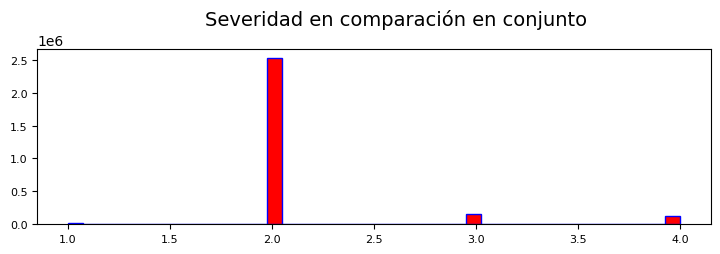

In [28]:
dfa[target].hist(bins=40, edgecolor='b', linewidth=1.0,
              xlabelsize=8, ylabelsize=8, grid=False, figsize=(6,2), color='red')    
plt.tight_layout(rect=(0, 0, 1.2, 1.2))   
plt.suptitle('Severidad en comparación en conjunto', x=0.65, y=1.25, fontsize=14);  

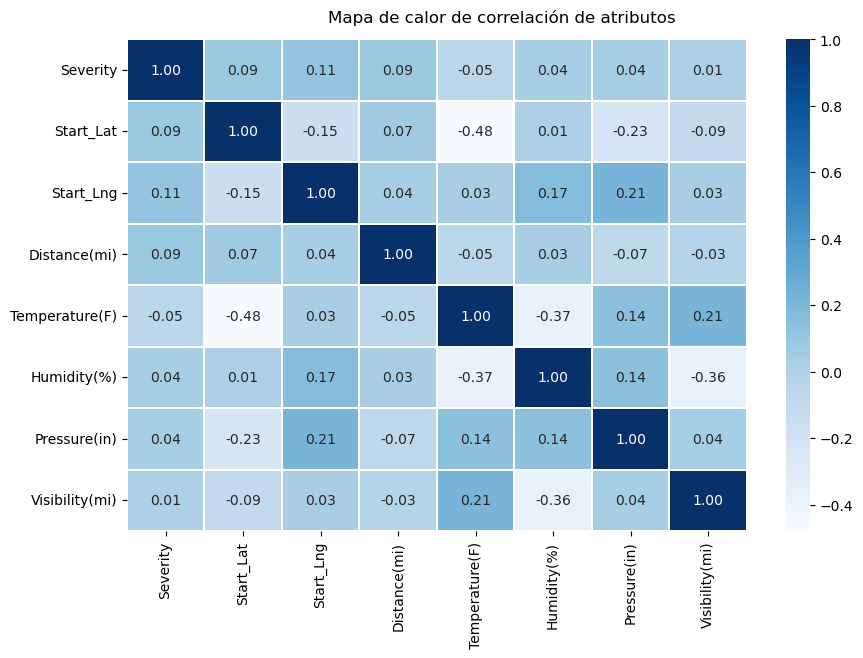

In [29]:
f, ax = plt.subplots(figsize=(10, 6))
corr = dfa.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="Blues",fmt='.2f',
            linewidths=.05)
f.subplots_adjust(top=0.93)
t = f.suptitle('Mapa de calor de correlación de atributos', fontsize=12)

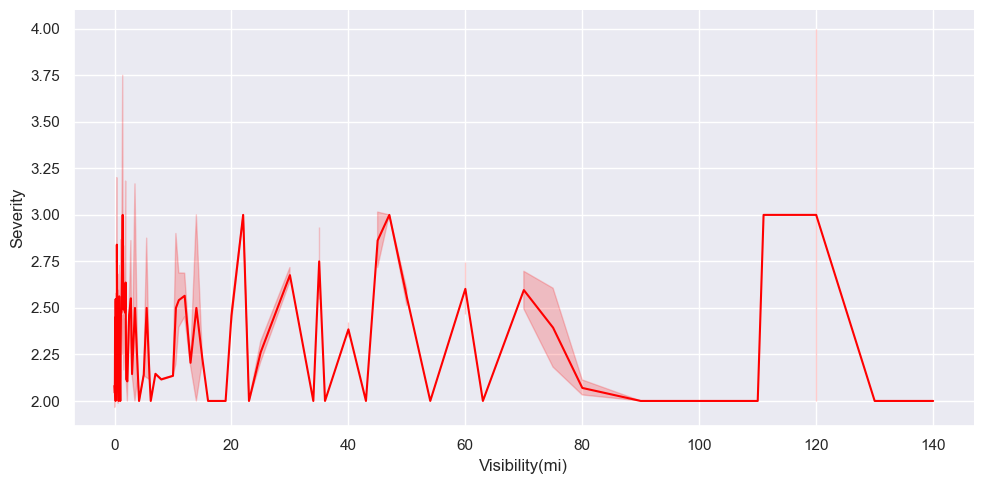

In [30]:
sns.set()
sns.relplot(data=dfa, x='Visibility(mi)', y=target, kind='line', height=5, aspect=2, color='red');

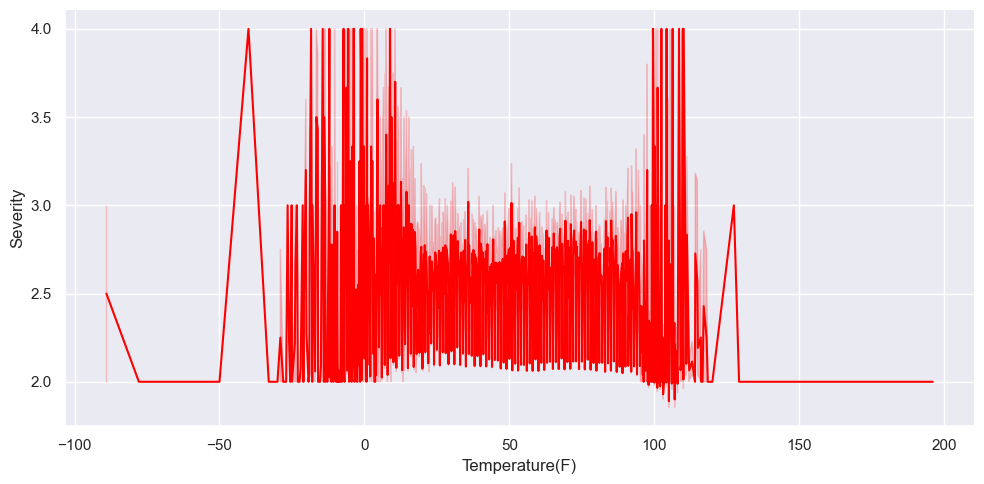

In [31]:
sns.set()
sns.relplot(data=dfa, x='Temperature(F)', y=target, kind='line', height=5, aspect=2, color='red');

Podemos observar que los reportes de accidentes son causados cuando la temperatura esta en condicion normal.

In [32]:
# crear nuestro vector objetivo separado, en y tengo los valores de quality y de dfa suprimo quality para trabajar con el resto 
y = dfa.pop('Severity')

# asignar el objetivo a una clase binaria con calidad = 2
y = y.apply(lambda x: 0 if x <= 2 else 1)

# Comprueba rápidamente que tenemos una partición de destino equilibrada
y.sum() / len(y)

0.10061989033304257

In [33]:
X_train, X_test, y_train, y_test = train_test_split(dfa, y, test_size=0.3, random_state=33)
X_train.shape, X_test.shape

((1991739, 7), (853603, 7))

In [34]:
xgb = XGBClassifier(objective='binary:logistic', random_state=33, n_jobs=-1)
xgb.fit(X_train, y_train, eval_metric = 'logloss')

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=-1, num_parallel_tree=None,
              predictor=None, random_state=33, ...)

In [35]:
xgb_predictions = xgb.predict(X_test)

In [36]:
def evaluation_scores(test, prediction, target_names=None):
    print('Precisión:', np.round(metrics.accuracy_score(test, prediction), 4)) 
    print('-'*60)
    print('Informe de clasificación:\n\n', metrics.classification_report(y_true=test, y_pred=prediction, target_names=target_names)) 
    
    classes = [0, 1]
    total_classes = len(classes)
    level_labels = [total_classes*[0], list(range(total_classes))]

    cm = metrics.confusion_matrix(y_true=test, y_pred=prediction, labels=classes)
    
    print('-'*60)
    print('Matriz de confusión:\n')
    print(cm) 

In [37]:
evaluation_scores(y_test, xgb_predictions, target_names=['Low Quality', 'Hight Quality'])

Precisión: 0.91
------------------------------------------------------------
Informe de clasificación:

                precision    recall  f1-score   support

  Low Quality       0.92      0.99      0.95    768062
Hight Quality       0.65      0.22      0.33     85541

     accuracy                           0.91    853603
    macro avg       0.79      0.60      0.64    853603
 weighted avg       0.89      0.91      0.89    853603

------------------------------------------------------------
Matriz de confusión:

[[758243   9819]
 [ 67036  18505]]


### Clasificación: ROC y AUC

Una curva ROC (curva de característica operativa del recepto) es un gráfico que muestra el rendimiento de un modelo de clasificación en todos los umbrales de clasificación. Esta curva representa dos parámetros:

- Tasa de verdaderos positivos
- Tasa de falsos positivos

https://stackabuse.com/understanding-roc-curves-with-python/

La curva AUC / ROC es probablemente una mejor evaluación para esta tarea de clasificación:

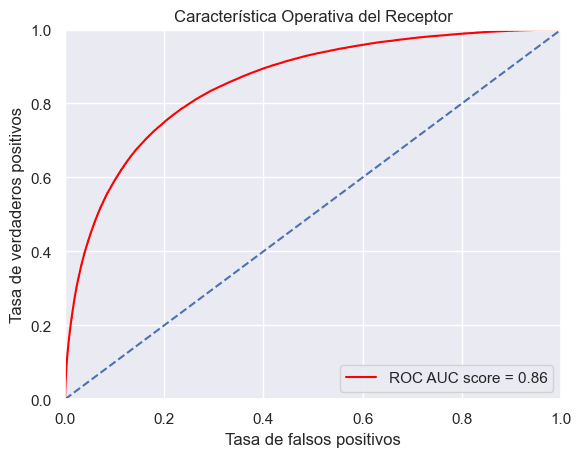

In [38]:
# calcular el FPR y el TPR para todos los umbrales de la clasificación
probs = xgb.predict_proba(X_test)
# Probabilidades positivas
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Característica Operativa del Receptor')
plt.plot(fpr, tpr, 'red', label = 'ROC AUC score = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'b--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('Tasa de verdaderos positivos')
plt.xlabel('Tasa de falsos positivos')
plt.show()

El AUC proporciona una medición agregada del rendimiento en todos los umbrales de clasificación posibles. Una forma de interpretar el AUC es como la probabilidad de que el modelo clasifique un ejemplo positivo aleatorio más alto que un ejemplo negativo aleatorio.

AUC = 0,86 bueno, no está mal sin ningún tipo de ajuste o ingeniería de características.

# 4. Interpretabilidad

### Interpretabilidad XGB
La interpretabilidad en machine learning se refiere a la capacidad de entender y explicar cómo un modelo de aprendizaje automático toma decisiones. Existen varios tipos de interpretabilidad en machine learning,algunas de las librerías más populares para interpretabilidad en Python son:

SHAP (SHapley Additive exPlanations): 
una librería para generar explicaciones para modelos de aprendizaje automático basadas en la teoría de juegos de Shapley.

LIME (Local Interpretable Model-agnostic Explanations): una librería para generar explicaciones para modelos de aprendizaje automático basadas en la aproximación de vecindario local.

ELI5 (Explain Like I'm 5): una librería para generar explicaciones para modelos de aprendizaje automático basadas en la importancia de las características.

interpret-ml: una librería para generar explicaciones para modelos de aprendizaje automático basadas en la importancia de las características y la visualización de decisiones.

Skater: una librería para generar explicaciones para modelos de aprendizaje automático basadas en la importancia de las características, visualizaciones y análisis de decisiones.

Es importante mencionar que estas son solo algunas de las librerías disponibles, hay muchas mas y nuevas surgien con el tiempo, es recomendable investigar y elegir la que mejor se adapte a tus necesidades.


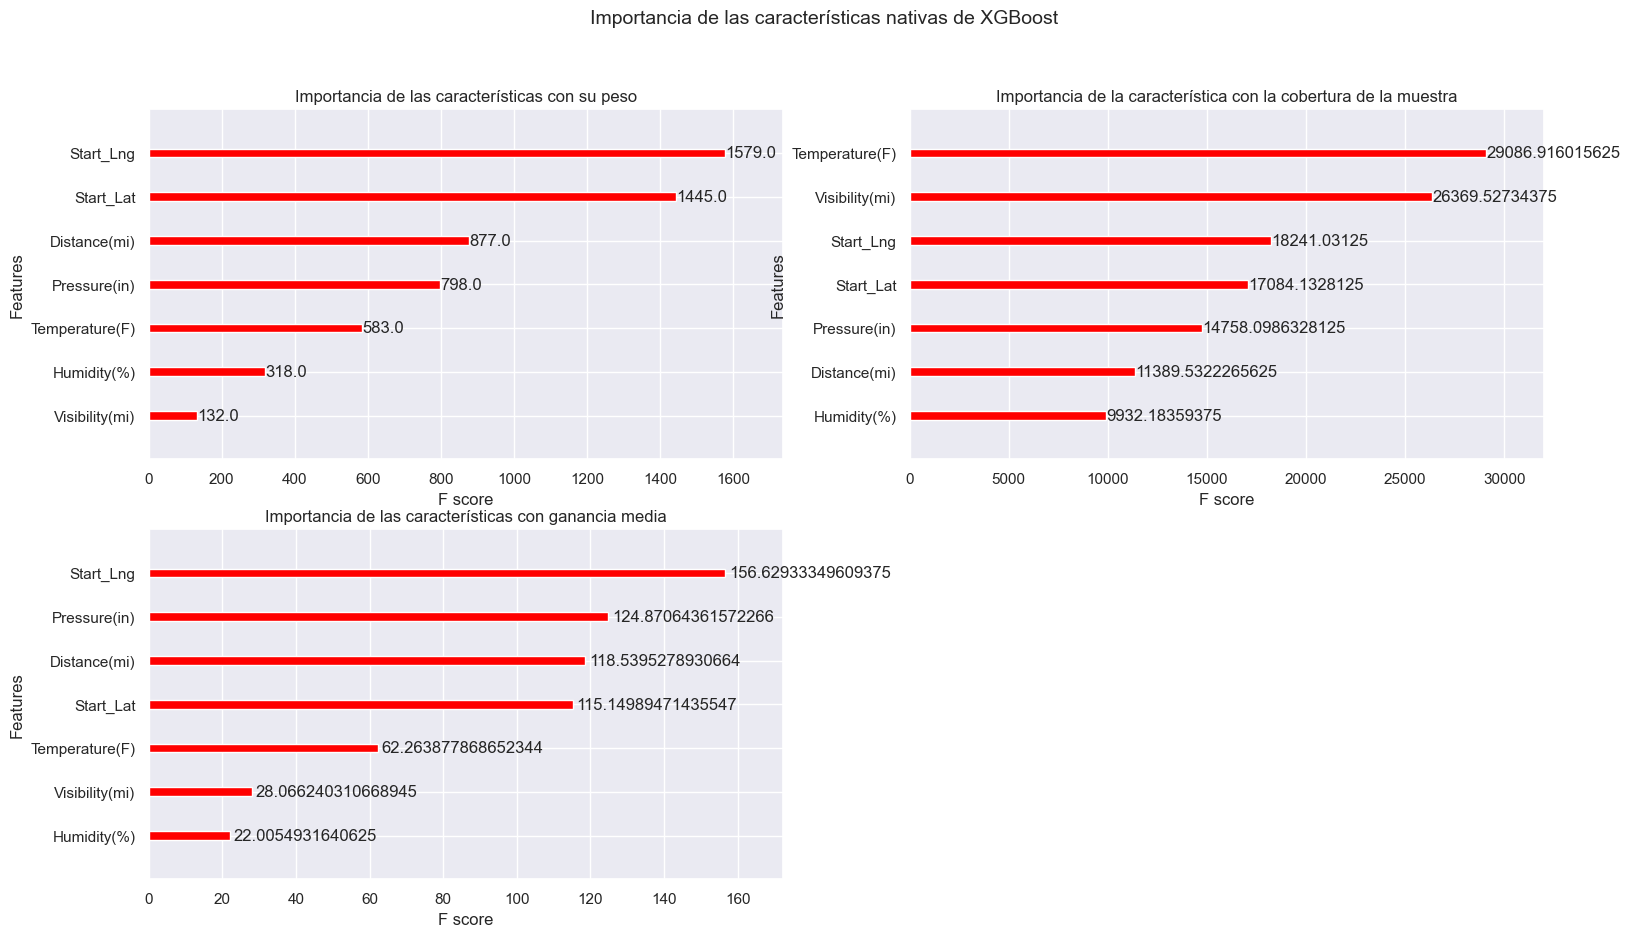

In [39]:
from xgboost import XGBClassifier, plot_importance

fig = plt.figure(figsize = (18, 10))
title = fig.suptitle("Importancia de las características nativas de XGBoost", fontsize=14)

ax1 = fig.add_subplot(2, 2, 1)
plot_importance(xgb, importance_type='weight', ax=ax1, color='red')
ax1.set_title("Importancia de las características con su peso");

ax2 = fig.add_subplot(2, 2, 2)
plot_importance(xgb, importance_type='cover', ax=ax2, color='red')
ax2.set_title("Importancia de la característica con la cobertura de la muestra");

ax3 = fig.add_subplot(2, 2, 3)
plot_importance(xgb, importance_type='gain', ax=ax3, color='red')
ax3.set_title("Importancia de las características con ganancia media");

In [40]:
import eli5
from eli5.sklearn import PermutationImportance

In [41]:
eli5.show_weights(xgb.get_booster())

Weight,Feature
0.2496,Start_Lng
0.1990,Pressure(in)
0.1889,Distance(mi)
0.1835,Start_Lat
0.0992,Temperature(F)
0.0447,Visibility(mi)
0.0351,Humidity(%)


In [42]:
dfa_nb = 0
print('Reference:', y_test.iloc[dfa_nb])
print('Predicted:', xgb_predictions[dfa_nb])
eli5.show_prediction(xgb.get_booster(), X_test.iloc[dfa_nb], 
                     feature_names=list(dfa.columns), show_feature_values=True)

Reference: 0
Predicted: 0


In [43]:
dfa_nb = 4
print('Reference:', y_test.iloc[dfa_nb])
print('Predicted:', xgb_predictions[dfa_nb])
eli5.show_prediction(xgb.get_booster(), X_test.iloc[dfa_nb], 
                     feature_names=list(dfa.columns), show_feature_values=True)

Reference: 0
Predicted: 0


In [44]:
xgb_array = XGBClassifier(objective='binary:logistic', random_state=33)
xgb_array.fit(X_train, y_train, eval_metric = 'logloss')

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=33, ...)

In [45]:
feat_permut = PermutationImportance(xgb_array, random_state=33).fit(X_train, y_train)
eli5.show_weights(feat_permut, feature_names = features_list)

Weight,Feature
0.0864 ± 0.0003,Start_Lng
0.0732 ± 0.0002,Start_Lat
0.0154 ± 0.0002,Pressure(in)
0.0122 ± 0.0002,Distance(mi)
0.0024 ± 0.0001,Temperature(F)
0.0009 ± 0.0000,Humidity(%)
0.0004 ± 0.0000,Visibility(mi)


In [46]:
from skater.core.explanations import Interpretation
from skater.model import InMemoryModel

In [47]:
interpreter = Interpretation(training_data=X_test, feature_names=features_list)
im_model = InMemoryModel(xgb.predict_proba, examples=X_train, target_names=['Low Quality', 'Hight Quality'])

[50/50] grid cells ████████████████████ Time elapsed: 6 seconds

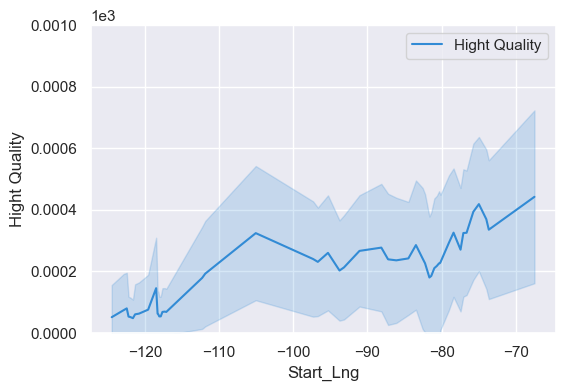

In [48]:
r = interpreter.partial_dependence.plot_partial_dependence(['Start_Lng'], im_model, grid_resolution=50, 
                                                           grid_range=(0,1), n_samples=1000, 
                                                           with_variance=True, figsize = (6, 4), n_jobs=-1)
yl = r[0][1].set_ylim(0, 1)

[10000/10000] grid cells ████████████████████ Time elapsed: 43 seconds

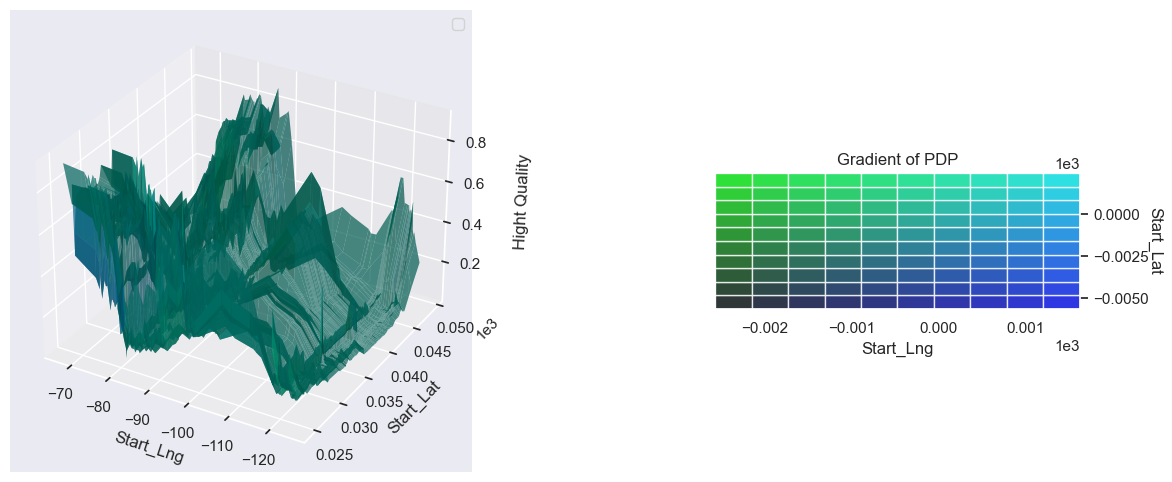

In [49]:
plots_list = interpreter.partial_dependence.plot_partial_dependence([('Start_Lng', 'Start_Lat')], 
                                                                    im_model, grid_range=(0,1), 
                                                                    n_samples=1000,
                                                                    figsize=(16, 6),
                                                                    grid_resolution=100,
                                                                    progressbar=True,
                                                                    n_jobs=-1)

In [50]:
# pip install shap
import shap

# load JS visualization code to notebook
shap.initjs()

In [51]:
explainer = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values(X_test)

In [52]:
X_shap = pd.DataFrame(shap_values)
X_shap.tail()

,0,1,2,3,4,5,6
853598,-0.335745,0.387431,0.074183,-0.021076,0.025287,0.000636,0.006961
853599,-0.043299,-1.318601,0.190277,-0.084731,-0.158993,-0.256690,0.006524
853600,0.072137,0.675420,0.036779,0.406191,-0.031049,0.215324,0.010176
853601,-0.480907,-0.095170,0.317974,0.044394,-0.108491,-0.055401,0.003842
853602,-1.826617,-0.397613,-0.089567,0.116661,-0.107651,0.122660,0.005767


In [53]:
print('Expected Value: ', explainer.expected_value)

Expected Value:  -2.3507948


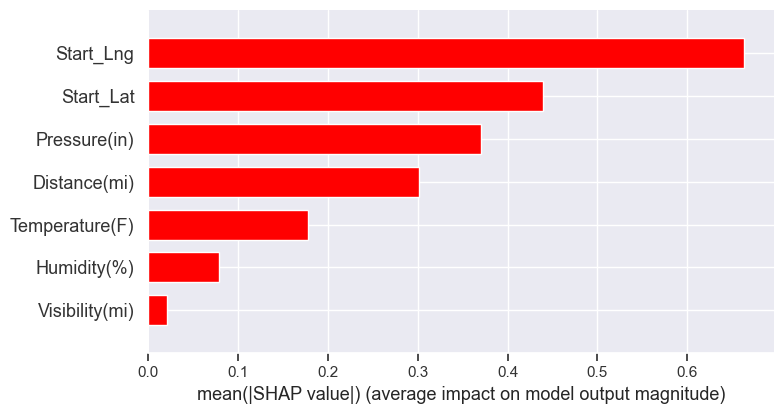

In [54]:
shap.summary_plot(shap_values, X_test, plot_type="bar", color='red')

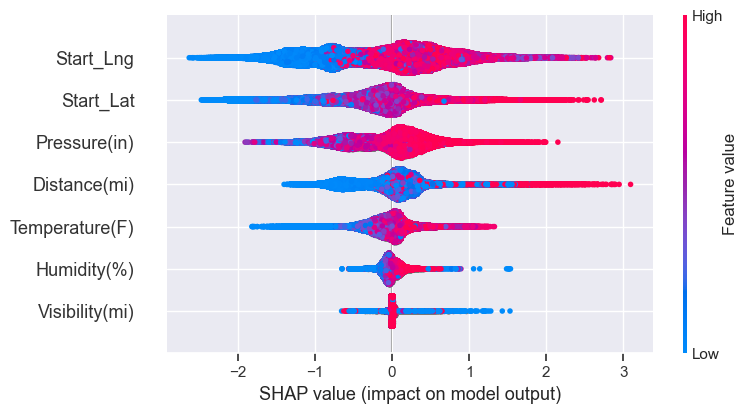

In [55]:
shap.summary_plot(shap_values, X_test)

# 5. Conclusiones

La longitud y latitud son las variables con más peso, esto tiene un gran sentido, ya que la gravedad de los accidentes están directamente influenciadas por el estado de las carreteras. Además la presión, distancia, temperatura, la visibilidad y humedad tienen una gran peso.

Con esto, podemos concluir que además de los errores humanos en la conducción, el estado de las carreteras y las condiciones del entorno tienen un gran peso en la gravedad de los accidentes.